In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from dataloader import get_MNIST
from models import get_4_layer, get_8_layer, get_VGG16


In [43]:
model_dict = {
    
    # 4 layer CNN
    # One Conv Layer + Max Pooling + 3 Dense Layers (softmax output)
    # Data = (n, 28, 28, 1)
    #----------------------------------------------------------------------------
    'four_layer': (get_MNIST(vgg_preprocess=False), get_4_layer(num_classes=10)),
    
    # 8 layer CNN
    # 5 Conv Layera + Max Pooling + 3 Dense Layers (softmax output)
    # Data = (n, 28, 28, 1)
    #----------------------------------------------------------------------------
    'eight_layer': (get_MNIST(vgg_preprocess=False), get_8_layer(num_classes=10)),
    
    # VGG16
    # 13 Conv Layera + Max Pooling + 3 Dense Layers (softmax output)
    # Data = (n, 48, 48, 3) - * VGG requires > 30 input features + >= 3 channels
    'vgg16': (get_MNIST(vgg_preprocess=True), get_VGG16(num_classes=10)),
    }




In [45]:
BATCH_SIZE = 64 #* as specified in paper
EPOCHS = 100 
LR = 3e-5 #* as specified in paper
LOSS = "categorical_crossentropy"
OPTIMIZER = Adam(LR)
METRICS = ['accuracy']

# logs = {}
for model_name in model_dict.keys():
    print(f'training model {model_name}')
    (x_train, y_train, x_test, y_test) = model_dict[model_name][0]
    model = model_dict[model_name][1]
    model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
    history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.1)
    logs[model_name] = history


training model vgg16
Epoch 1/100
111/844 [==>...........................] - ETA: 15:05 - loss: 0.2615 - accuracy: 0.9216

KeyboardInterrupt: 

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

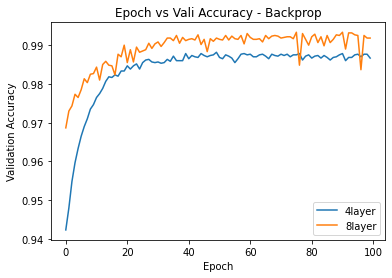

In [46]:
sns.lineplot(x = range(EPOCHS), y = logs['four_layer'].history['val_accuracy'], label = '4layer')
sns.lineplot(x = range(EPOCHS), y = logs['eight_layer'].history['val_accuracy'], label = '8layer')
# sns.lineplot(x = range(EPOCHS), y = logs['vgg16'].history['val_accuracy'], label = 'vgg16')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Epoch vs Vali Accuracy - Backprop')
plt.legend()
plt.show()
